Data from https://dataunderground.org/dataset/fossils

In [2]:
import lasio
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm.auto import tqdm
import pandas as pd
import geopandas as gpd
import numpy as np
from pathlib import Path

In [3]:
data_in = Path("../../data/raw/fossil_image_classification")
data_out = Path("../../data/processed/fossil_image_classification")

In [4]:
y = np.load(data_in / "y.npy")
X = np.load(data_in / "X.npy").reshape((-1, 1, 32, 32))
X.shape, y.shape

((586, 1, 32, 32), (586,))

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)
X_train.shape, X_val.shape

((439, 1, 32, 32), (147, 1, 32, 32))

In [6]:
classes = np.unique(y_train)
classes

array(['ammonites', 'fish', 'trilobites'], dtype='<U10')

array(['fish', 'ammonites', 'trilobites', 'ammonites', 'ammonites',
       'fish', 'trilobites', 'ammonites', 'fish', 'fish', 'ammonites',
       'fish', 'fish', 'ammonites', 'fish', 'trilobites', 'trilobites',
       'trilobites', 'trilobites', 'ammonites', 'trilobites', 'ammonites',
       'ammonites', 'ammonites', 'ammonites', 'fish', 'trilobites',
       'trilobites', 'trilobites', 'fish', 'trilobites', 'fish'],
      dtype='<U10')

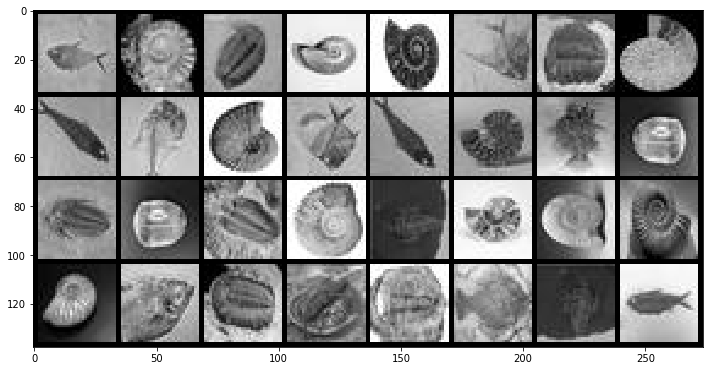

In [7]:
import torchvision
import torch

im = torchvision.utils.make_grid(torch.from_numpy(X_train[: 8 * 4]))
im = im.permute(1, 2, 0).numpy()
plt.figure(figsize=(12, 12))
plt.imshow(im, interpolation="none")
y_train[: 8 * 4]

In [8]:
data_out.mkdir(parents=True, exist_ok=True)
np.save(data_out / "X_train.npy", X_train)
np.save(data_out / "y_train.npy", y_train)
np.save(data_out / "X_val.npy", X_val)
np.save(data_out / "y_val.npy", y_val)